In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *


from PIL import Image
from numpy import array

import skimage
import time

In [3]:
camvid = untar_data(URLs.CAMVID)
path_lbl = camvid/'labels'
path_img = camvid/'images'
path_vidFrames = camvid/'commaImages'

# All commaAI images that are segmented are going to be in here 
path_Predicted = camvid/'predictedImages'

In [4]:
camvid.ls()

[PosixPath('/home/jupyter/.fastai/data/camvid/opticalFlow'),
 PosixPath('/home/jupyter/.fastai/data/camvid/export.pkl'),
 PosixPath('/home/jupyter/.fastai/data/camvid/segmentedImages'),
 PosixPath('/home/jupyter/.fastai/data/camvid/vidFramesCopy'),
 PosixPath('/home/jupyter/.fastai/data/camvid/images'),
 PosixPath('/home/jupyter/.fastai/data/camvid/codes.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/labels'),
 PosixPath('/home/jupyter/.fastai/data/camvid/base92.pkl'),
 PosixPath('/home/jupyter/.fastai/data/camvid/valid.txt'),
 PosixPath('/home/jupyter/.fastai/data/camvid/commaImages')]

# Data Prep, continued

In [5]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str);  codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [6]:
# get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [7]:
name2id = {v:k for k,v in enumerate(codes)}; name2id

{'Animal': 0,
 'Archway': 1,
 'Bicyclist': 2,
 'Bridge': 3,
 'Building': 4,
 'Car': 5,
 'CartLuggagePram': 6,
 'Child': 7,
 'Column_Pole': 8,
 'Fence': 9,
 'LaneMkgsDriv': 10,
 'LaneMkgsNonDriv': 11,
 'Misc_Text': 12,
 'MotorcycleScooter': 13,
 'OtherMoving': 14,
 'ParkingBlock': 15,
 'Pedestrian': 16,
 'Road': 17,
 'RoadShoulder': 18,
 'Sidewalk': 19,
 'SignSymbol': 20,
 'Sky': 21,
 'SUVPickupTruck': 22,
 'TrafficCone': 23,
 'TrafficLight': 24,
 'Train': 25,
 'Tree': 26,
 'Truck_Bus': 27,
 'Tunnel': 28,
 'VegetationMisc': 29,
 'Void': 30,
 'Wall': 31}

In [8]:
void_code = name2id['Void']
name2id['Void']

def acc_camvid(input, target):
    
    target = target.squeeze(1)
    print('target= ', target)
    
    mask = target != void_code
    print('mask= ', mask)
    
    return (input.argmax(dim=1)[mask] == target[mask]).float().mean()

#### Create an array of strings
- Strings are file names of every frame in dash-cam video

In [9]:
frames = get_image_files(path_vidFrames)

# Load learner

In [10]:
# Loading a previously trained model for segmentation
learn= load_learner(camvid)

In [11]:
# Get image files from 
frames = get_image_files(path_vidFrames)

In [12]:
numOfImages = len(frames)

In [13]:
numOfImages

20400

# Prepare Images, Segmentation Predictions
- Save images to predictedImages Folder

In [14]:
# Image count starts at 1
count = 1

arr = []

while count <= numOfImages:

    img = open_image(path_vidFrames/f'frame{count}.jpg')
    
    # Crop the TOP and BOTTOM of images (top is just sky, bottom is dashboard)
#     imgVersion2 = crop_pad(img, (360, 640), 'border', 1.55, 0.)
#     crop_pad(imgVersion2, (190, 640), 'border', 0., 0.)
    
    
    # Alter the BRIGHTNESS
    brightness(img, 0.55)

    pred = learn.predict(img)
    
    # Save GRAYSCALE image here as JPG image
#     pred[0].save(f'/home/jupyter/.fastai/data/camvid/predictedImages/predImg{count}.jpg')
    x = image2np(pred[0].data).astype(np.uint8)
    PIL.Image.fromarray(x).save(f'/home/jupyter/.fastai/data/camvid/segmentedImages/segImage{count}.png')
    
    if (count % 1000 == 0) or (count %20400 == 0):
        print('Number of images segemented so far: ', count)
    
        
    # Increase count, move on to next image
    count += 1
    

Number of images segemented so far:  1000
Number of images segemented so far:  2000
Number of images segemented so far:  3000
Number of images segemented so far:  4000
Number of images segemented so far:  5000
Number of images segemented so far:  6000
Number of images segemented so far:  7000
Number of images segemented so far:  8000
Number of images segemented so far:  9000
Number of images segemented so far:  10000
Number of images segemented so far:  11000
Number of images segemented so far:  12000
Number of images segemented so far:  13000
Number of images segemented so far:  14000
Number of images segemented so far:  15000
Number of images segemented so far:  16000
Number of images segemented so far:  17000
Number of images segemented so far:  18000
Number of images segemented so far:  19000
Number of images segemented so far:  20000


# Tests: 

#### Full Frame

In [43]:
img = open_image(path_vidFrames/'frame619.jpg')

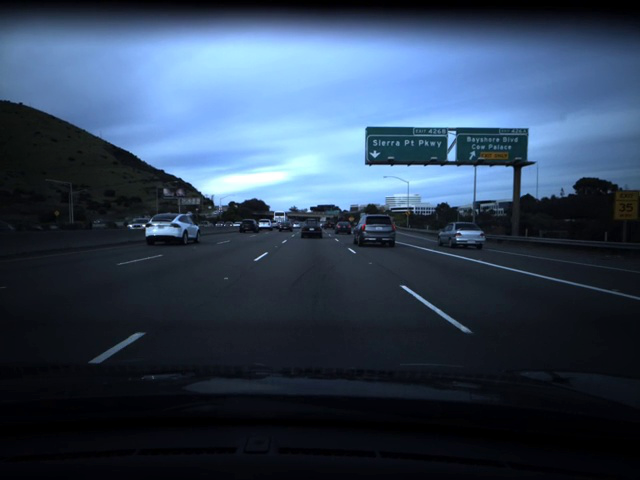

In [44]:
brightness(img, 0.50)

In [45]:
pred = learn.predict(img)

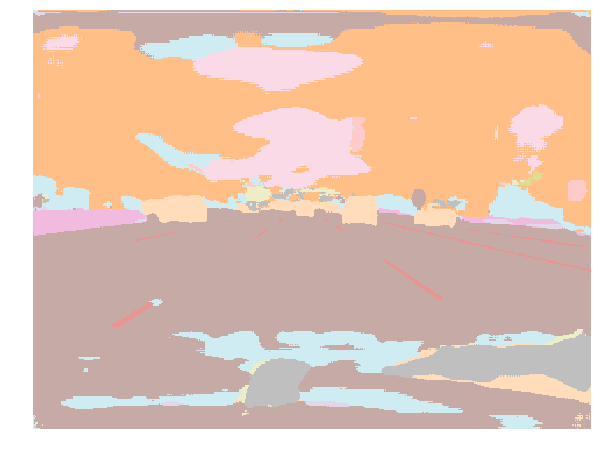

In [46]:
pred[0].show(figsize=(10,10))

In [53]:
pred[0].shape

torch.Size([1, 360, 480])

In [48]:
d.shape

torch.Size([172800])

In [49]:
import matplotlib

matplotlib.image.imsave('segImageOnly.png', d)


TypeError: Invalid dimensions for image data

In [20]:
from torchvision.utils import save_image

In [24]:
type(pred[1])

torch.Tensor

In [29]:
torchPred = pred[1]

In [30]:
type(torchPred)

torch.Tensor

In [39]:
save_image(pred[1]*255, 'zzzzzzzzz.png')

In [40]:
x = image2np(pred[0].data).astype(np.uint8)
PIL.Image.fromarray(x).save('zzzzzzzzz.png')




In [33]:
save_image(pred[0].data, 'notWhiteImage.png')

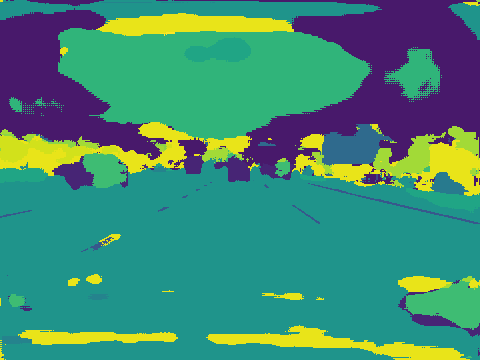

In [28]:
pred[0]

#### Prepare Image

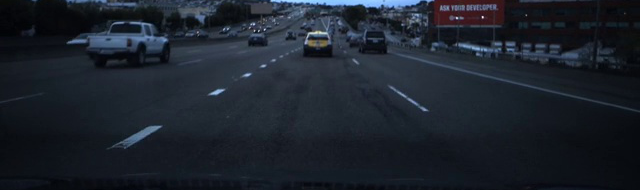

In [14]:
img = open_image(path_vidFrames/'frame6929.jpg')
d = crop_pad(img, (360, 640), 'border', 1.55, 0.)
crop_pad(d, (190, 640), 'border', 0., 0.)

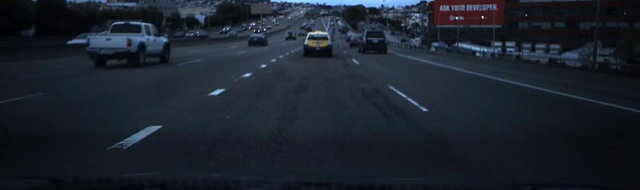

In [15]:
brightness(d, 0.50)

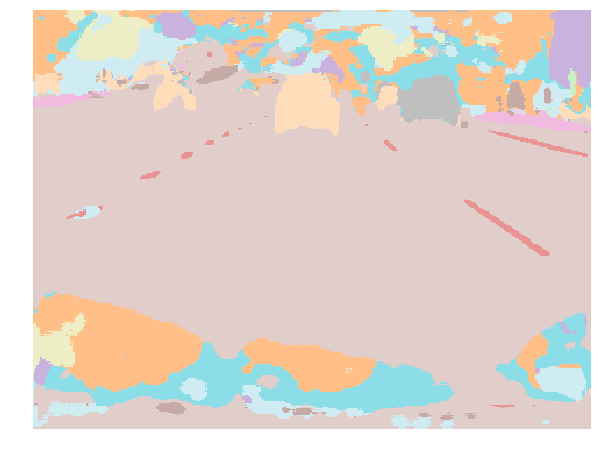

In [16]:
pred = learn.predict(d)
pred[0].show(figsize=(10,10))

In [18]:
print(np.unique(image2np(pred[0].data)))


[ 1  4  5  8 10 12 14 15 16 17 18 19 21 22 26 27 29 30]


In [19]:
type(pred[1])

torch.Tensor

In [18]:
e = (pred[0].data)

In [20]:
from torchvision.utils import save_image
import torch
import torchvision

In [27]:
# de = pred[1].data
# save_image(de, 'imgTensor.jpg')

In [100]:
pred[1].shape

torch.Size([1, 360, 480])

In [44]:
x = image2np(pred[0].data).astype(np.uint8)
PIL.Image.fromarray(x).save('pilTest.jpg')





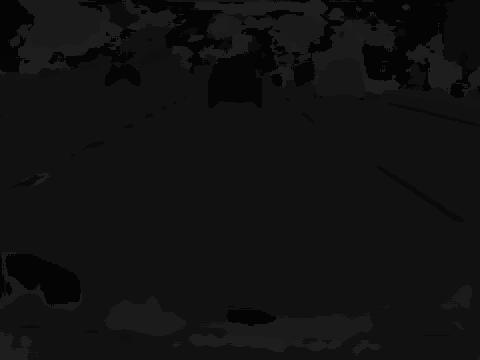

In [46]:
savedImage = open_image('pilTest.jpg')
savedImage

In [ ]:

pred[0].data

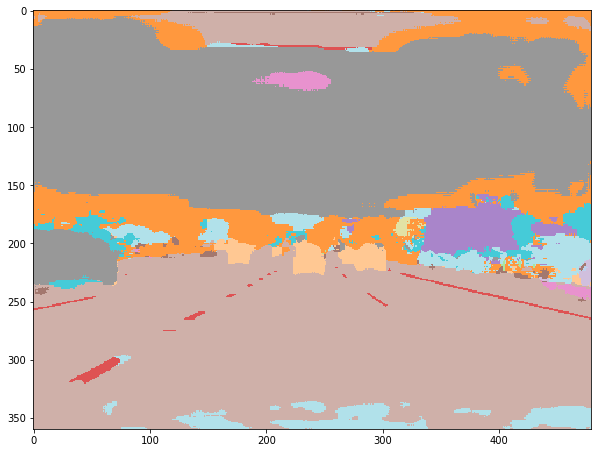

In [106]:
img = open_image(path_vidFrames/'frame6922.jpg')
crop_pad(img, (390, 640), 'border', 0., 0.)
brightness(img, 0.71)
pred = learn.predict(img)
pred[0].show(figsize=(10,10), hide_axis=False, alpha=.8)